In [1]:
import json
import numpy as np
import pandas as pd
import PyPDF2
import docx2txt
import sys
import matplotlib.pyplot as plt
%matplotlib inline 
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from pyrouge import Rouge155
import nltk
import seaborn as sns

In [2]:
data = []
with open('train.01.jsonl') as f:
    for line in f:
        data.append(json.loads(line))

In [3]:
type(data)

list

In [14]:
import sys
pd.set_option("display.max_colwidth", 0)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
print(data[0]['paragraphs'][1])

[['Lula', 'menuturkan', ',', 'sakit', 'itu', 'membuat', 'Ryan', 'mesti', 'vakum', 'dari', 'semua', 'kegiatannya', ',', 'termasuk', 'menjadi', 'pembawa', 'acara', 'Dokter', 'Oz', 'Indonesia', '.'], ['Kondisi', 'itu', 'membuat', 'Ryan', 'harus', 'kembali', 'ke', 'kampung', 'halamannya', 'di', 'Pekanbaru', ',', 'Riau', 'untuk', 'menjalani', 'istirahat', '.']]


In [5]:
import pandas as pd

In [7]:
df = pd.DataFrame(data)

In [10]:
df.head(5)

,category,gold_labels,id,paragraphs,source,source_url,summary
0,tajuk utama,"[[False, True], [True, True], [False, False, F...",1501893029-lula-kamal-dokter-ryan-thamrin-saki...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Dokter, R...",cnn indonesia,https://www.cnnindonesia.com/hiburan/201708041...,"[[Dokter, Lula, Kamal, yang, merupakan, selebr..."
1,teknologi,"[[False, False, False, False], [False, True, T...",1509072914-dua-smartphone-zenfone-baru-tawarka...,"[[[Selfie, ialah, salah, satu, tema, terpanas,...",dailysocial.id,https://dailysocial.id/post/dua-smartphone-zen...,"[[Asus, memperkenalkan, , ZenFone, generasi, ..."
2,hiburan,"[[True], [True], [False, False], [False], [Fal...",1510613677-songsong-visit-2020-bengkulu-perkua...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Dinas, Pa...",cnn indonesia,https://www.cnnindonesia.com/gaya-hidup/201711...,"[[Dinas, Pariwisata, Provinsi, Bengkulu, kemba..."
3,tajuk utama,"[[True, True], [False, False, False], [True], ...",1502706803-icw-ada-kejanggalan-atas-tewasnya-s...,"[[[Merdeka.com, -, Indonesia, Corruption, Watc...",merdeka,https://www.merdeka.com/peristiwa/icw-merasa-a...,"[[Indonesia, Corruption, Watch, (, ICW, ), mem..."
4,tajuk utama,"[[False, True], [True, True, True], [False], [...",1503039338-pembagian-sepeda-usai-upacara-penur...,"[[[Merdeka.com, -, Presiden, Joko, Widodo, (, ...",merdeka,https://www.merdeka.com/peristiwa/usai-upacara...,"[[Jokowi, memimpin, upacara, penurunan, bender..."


In [15]:
df[['paragraphs', 'summary']].head(5)

paragraphs  \
0  [[[Jakarta, ,, CNN, Indonesia, -, -, Dokter, Ryan, Thamrin, ,, yang, terkenal, lewat, acara, Dokter, Oz, Indonesia, ,, meninggal, dunia, pada, Jumat, (, 4, /, 8, ), dini, hari, .], [Dokter, Lula, Kamal, yang, merupakan, selebriti, sekaligus, rekan, kerja, Ryan, menyebut, kawannya, itu, sudah, sakit, sejak, setahun, yang, lalu, .]], [[Lula, menuturkan, ,, sakit, itu, membuat, Ryan, mesti, vakum, dari, semua, kegiatannya, ,, termasuk, menjadi, pembawa, acara, Dokter, Oz, Indonesia, .], [Kondisi, itu, membuat, Ryan, harus, kembali, ke, kampung, halamannya, di, Pekanbaru, ,, Riau, untuk, menjalani, istirahat, .]], [[", Setahu, saya, dia, orangnya, sehat, ,, tapi, tahun, lalu, saya, dengar, dia, sakit, .], [(, Karena, ), sakitnya, ,, ia, langsung, pulang, ke, Pekanbaru, ,, jadi, kami, yang, mau, jenguk, juga, susah, .], [Barangkali, mau, istirahat, ,, ya, betul, juga, ,, kalau, di, Jakarta, susah, isirahatnya, ,, ", kata, Lula, kepada, CNNIndonesia.com, ,, Jumat, (, 4, /, 8, ), .]], [[Lula, yang, mengenal, Ryan, sejak, sebelum, aktif, berkarier, di, televisi, mengaku, belum, sempat, membesuk, Ryan, lantaran, lokasi, yang, jauh, .], [Dia, juga, tak, tahu, penyakit, apa, yang, diderita, Ryan, .]], [[", Itu, saya, enggak, tahu, ,, belum, sempat, jenguk, dan, enggak, selamanya, bisa, dijenguk, juga, .], [Enggak, tahu, berat, sekali, apa, bagaimana, ,, ", tutur, Ryan, .]], [[Walau, sudah, setahun, menderita, sakit, ,, Lula, tak, mengetahui, apa, penyebab, pasti, kematian, Dr, Oz, Indonesia, itu, .], [Meski, demikian, ,, ia, mendengar, beberapa, kabar, yang, menyebut, bahwa, penyebab, Ryan, meninggal, adalah, karena, jatuh, di, kamar, mandi, .]], [[“, Saya, tidak, tahu, ,, barangkali, penyakit, yang, dulu, sama, yang, sekarang, berbeda, ,, atau, penyebab, kematiannya, beda, dari, penyakit, sebelumnya, .], [Kita, kan, enggak, bisa, mengambil, kesimpulan, ,, ", kata, Lula, .]], [[Ryan, Thamrin, terkenal, sebagai, dokter, yang, rutin, membagikan, tips, dan, informasi, kesehatan, lewat, tayangan, Dokter, Oz, Indonesia, .]], [[Ryan, menempuh, Pendidikan, Dokter, pada, tahun, 2002, di, Fakultas, Kedokteran, Universitas, Gadjah, Mada, .], [Dia, kemudian, melanjutkan, pendidikan, Klinis, Kesehatan, Reproduksi, dan, Penyakit, Menular, Seksual, di, Mahachulalongkornrajavidyalaya, University, ,, Bangkok, ,, Thailand, pada, 2004, .]]]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [16]:
article = df.paragraphs[4]
ref_sum = df.summary[4]

In [19]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
print(TreebankWordDetokenizer().detokenize(ref_sum[0]))

Jokowi memimpin upacara penurunan bendera.


In [17]:
import re
def untokenize(words):
    """
    Untokenizing a text undoes the tokenizing operation, restoring
    punctuation and spaces to the places that people expect them to be.
    Ideally, `untokenize(tokenize(text))` should be identical to `text`,
    except for line breaks.
    """
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

untokenize(article[0][0])

'Merdeka.com - Presiden Joko Widodo (Jokowi) memimpin upacara penurunan bendera di Halaman Istana Merdeka,   Jakarta.'

In [20]:
sentences_list = []
for paragraph in article:
    for sentence in paragraph:
        sentences_list.append(TreebankWordDetokenizer().detokenize(sentence))
    #sentence_list.append(TreebankWordDetokenizer().detokenize(sentence)

ref_sentences_list =[]
for sentence in ref_sum:
    ref_sentences_list.append(TreebankWordDetokenizer().detokenize(sentence))

In [62]:
data = "Mie instan adalah makanan yang rasannya sangat enak. Tak heran bila makanan in banyak dicintai oleh masyarakat. Namun ternyata sering mengkonsumsi mie instan membawa dampak buruk bagi tubuh. Terlalu banyak makan mie instan dapat meningkatkan risiko penyakit kanker, gangguan usus, ginjal hingga obesitas. Karena dampak buruk yang ditimbulkan, maka sebaiknya konsumsi mie instan dihindari. Sebisa mungkin ganti mie instan dengan makanan lain. Kalaupun ingin makan mie instan, sebaiknya beri tenggang waktu antara 2 – 3 hari. Jika sudah terbiasa dengan tenggang waktu tersebut, maka bisa diperpanjang menjadi 5 – 6 hari dan seterusnya. Hal ini dapat membantu siapapun mengurangi konsumsi mie instan dengan lebih baik."
sentences_list = nltk.sent_tokenize(data)

In [63]:
for i in sentences_list:
    print(i)
print('\n\n\n')
for i in ref_sentences_list:
    print(i)

Mie instan adalah makanan yang rasannya sangat enak.
Tak heran bila makanan in banyak dicintai oleh masyarakat.
Namun ternyata sering mengkonsumsi mie instan membawa dampak buruk bagi tubuh.
Terlalu banyak makan mie instan dapat meningkatkan risiko penyakit kanker, gangguan usus, ginjal hingga obesitas.
Karena dampak buruk yang ditimbulkan, maka sebaiknya konsumsi mie instan dihindari.
Sebisa mungkin ganti mie instan dengan makanan lain.
Kalaupun ingin makan mie instan, sebaiknya beri tenggang waktu antara 2 – 3 hari.
Jika sudah terbiasa dengan tenggang waktu tersebut, maka bisa diperpanjang menjadi 5 – 6 hari dan seterusnya.
Hal ini dapat membantu siapapun mengurangi konsumsi mie instan dengan lebih baik.




Jokowi memimpin upacara penurunan bendera.
Usai prosesi tersebut, Jokowi bagi-bagi sepeda kepada tamu undangan yang mengenakan pakaian adat terbaik.
Berbeda dengan saat upacara pengibaran bendera, bagi-bagi sepeda kali ini diumumkan oleh Wakil Presiden Jusuf Kalla (JK).
Hal berbe

In [64]:
len(sentences_list)

9

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(sentences_list)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(71, 9)


,0,1,2,3,4,5,6,7,8
adalah,0.42,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
antara,0.00,0.00,0.00,0.00,0.0,0.0,0.35,0.00,0.00
bagi,0.00,0.00,0.34,0.00,0.0,0.0,0.00,0.00,0.00
baik,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.33
banyak,0.00,0.29,0.00,0.24,0.0,0.0,0.00,0.00,0.00
beri,0.00,0.00,0.00,0.00,0.0,0.0,0.35,0.00,0.00
bila,0.00,0.35,0.00,0.00,0.0,0.0,0.00,0.00,0.00
bisa,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.28,0.00
buruk,0.00,0.00,0.28,0.00,0.3,0.0,0.00,0.00,0.00
dampak,0.00,0.00,0.28,0.00,0.3,0.0,0.00,0.00,0.00


In [66]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(dt_matrix, dt_matrix)

In [67]:
cosine_sim

array([[1.        , 0.07868556, 0.06185661, 0.05193041, 0.17390833,
        0.17463617, 0.06509359, 0.        , 0.06005704],
       [0.07868556, 1.        , 0.        , 0.07001458, 0.        ,
        0.07991708, 0.        , 0.        , 0.        ],
       [0.06185661, 0.        , 1.        , 0.04160925, 0.22557247,
        0.06282473, 0.05215625, 0.        , 0.04812071],
       [0.05193041, 0.07001458, 0.04160925, 1.        , 0.04459214,
        0.05274318, 0.1148703 , 0.        , 0.10598233],
       [0.17390833, 0.        , 0.22557247, 0.04459214, 1.        ,
        0.06732853, 0.146636  , 0.07293465, 0.1352902 ],
       [0.17463617, 0.07991708, 0.06282473, 0.05274318, 0.06732853,
        1.        , 0.06611237, 0.0652157 , 0.13585641],
       [0.06509359, 0.        , 0.05215625, 0.1148703 , 0.146636  ,
        0.06611237, 1.        , 0.21485169, 0.05063889],
       [0.        , 0.        , 0.        , 0.        , 0.07293465,
        0.0652157 , 0.21485169, 1.        , 0.04995208],


In [68]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(9, 9)


array([[1.   , 0.079, 0.062, 0.052, 0.174, 0.175, 0.065, 0.   , 0.06 ],
       [0.079, 1.   , 0.   , 0.07 , 0.   , 0.08 , 0.   , 0.   , 0.   ],
       [0.062, 0.   , 1.   , 0.042, 0.226, 0.063, 0.052, 0.   , 0.048],
       [0.052, 0.07 , 0.042, 1.   , 0.045, 0.053, 0.115, 0.   , 0.106],
       [0.174, 0.   , 0.226, 0.045, 1.   , 0.067, 0.147, 0.073, 0.135],
       [0.175, 0.08 , 0.063, 0.053, 0.067, 1.   , 0.066, 0.065, 0.136],
       [0.065, 0.   , 0.052, 0.115, 0.147, 0.066, 1.   , 0.215, 0.051],
       [0.   , 0.   , 0.   , 0.   , 0.073, 0.065, 0.215, 1.   , 0.05 ],
       [0.06 , 0.   , 0.048, 0.106, 0.135, 0.136, 0.051, 0.05 , 1.   ]])

0 Mie instan adalah makanan yang rasannya sangat enak.
1 Tak heran bila makanan in banyak dicintai oleh masyarakat.
2 Namun ternyata sering mengkonsumsi mie instan membawa dampak buruk bagi tubuh.
3 Terlalu banyak makan mie instan dapat meningkatkan risiko penyakit kanker, gangguan usus, ginjal hingga obesitas.
4 Karena dampak buruk yang ditimbulkan, maka sebaiknya konsumsi mie instan dihindari.
5 Sebisa mungkin ganti mie instan dengan makanan lain.
6 Kalaupun ingin makan mie instan, sebaiknya beri tenggang waktu antara 2 – 3 hari.
7 Jika sudah terbiasa dengan tenggang waktu tersebut, maka bisa diperpanjang menjadi 5 – 6 hari dan seterusnya.
8 Hal ini dapat membantu siapapun mengurangi konsumsi mie instan dengan lebih baik.


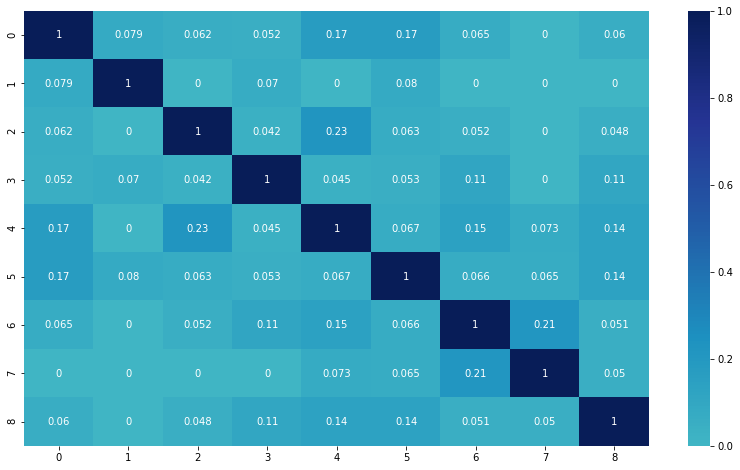

In [69]:
#ax = sns.heatmap(cosine_sim, annot=True, center=0.3, xticklabels=sentences_list, yticklabels=sentences_list)
for i in range(len(sentences_list)):
    print(i, sentences_list[i])
plt.figure(figsize=(14,8))
ax = sns.heatmap(cosine_sim, annot=True, center=0, cmap="YlGnBu")
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10,
 #        rotation_mode="anchor")
#plt.show"""

In [70]:
similarity_graph = nx.from_numpy_array(cosine_sim)
similarity_graph

In [71]:
from scipy.sparse.linalg import svds

def low_rank_svd(matrix, singular_count):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [72]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [73]:
num_sentences = len(sentences_list)
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, num_topics)
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(71, 3) (3,) (3, 9)


In [74]:
scores = nx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score
                          in scores.items()),
                         reverse=True)
ranked_sentences

[(0.1253489987074468, 4),
 (0.11806941858269104, 5),
 (0.11774529342534415, 6),
 (0.11535241289031463, 0),
 (0.11070601758271584, 8),
 (0.1070600867097355, 3),
 (0.10536973328818475, 2),
 (0.10200935486387971, 7),
 (0.09833868394968771, 1)]

0 0.11535241289031463
1 0.09833868394968771
2 0.10536973328818475
3 0.1070600867097355
4 0.1253489987074468
5 0.11806941858269104
6 0.11774529342534415
7 0.10200935486387971
8 0.11070601758271584


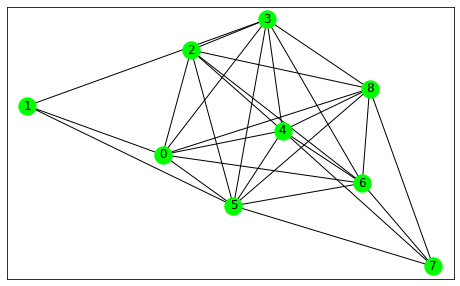

In [75]:
plt.figure(figsize=(8,5))
nx.draw_networkx(similarity_graph, node_color='lime')
for i in scores:
    print(i, scores[i])

In [76]:
top_sentence = [ranked_sentences[index][1]
               for index in range(num_sentences)]
top_sentence.sort()

In [77]:
print('\n'.join(np.array(sentences_list)[top_sentence]))

Mie instan adalah makanan yang rasannya sangat enak.
Tak heran bila makanan in banyak dicintai oleh masyarakat.
Namun ternyata sering mengkonsumsi mie instan membawa dampak buruk bagi tubuh.
Terlalu banyak makan mie instan dapat meningkatkan risiko penyakit kanker, gangguan usus, ginjal hingga obesitas.
Karena dampak buruk yang ditimbulkan, maka sebaiknya konsumsi mie instan dihindari.
Sebisa mungkin ganti mie instan dengan makanan lain.
Kalaupun ingin makan mie instan, sebaiknya beri tenggang waktu antara 2 – 3 hari.
Jika sudah terbiasa dengan tenggang waktu tersebut, maka bisa diperpanjang menjadi 5 – 6 hari dan seterusnya.
Hal ini dapat membantu siapapun mengurangi konsumsi mie instan dengan lebih baik.


In [78]:
for i in scores:
    print(i, scores[i])

0 0.11535241289031463
1 0.09833868394968771
2 0.10536973328818475
3 0.1070600867097355
4 0.1253489987074468
5 0.11806941858269104
6 0.11774529342534415
7 0.10200935486387971
8 0.11070601758271584


In [79]:
sentence_array = sorted(((scores[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [80]:
print(sentence_array)

[['0.1253489987074468'
  'Karena dampak buruk yang ditimbulkan, maka sebaiknya konsumsi mie instan dihindari.']
 ['0.11806941858269104'
  'Sebisa mungkin ganti mie instan dengan makanan lain.']
 ['0.11774529342534415'
  'Kalaupun ingin makan mie instan, sebaiknya beri tenggang waktu antara 2 – 3 hari.']
 ['0.11535241289031463'
  'Mie instan adalah makanan yang rasannya sangat enak.']
 ['0.11070601758271584'
  'Hal ini dapat membantu siapapun mengurangi konsumsi mie instan dengan lebih baik.']
 ['0.1070600867097355'
  'Terlalu banyak makan mie instan dapat meningkatkan risiko penyakit kanker, gangguan usus, ginjal hingga obesitas.']
 ['0.10536973328818475'
  'Namun ternyata sering mengkonsumsi mie instan membawa dampak buruk bagi tubuh.']
 ['0.10200935486387971'
  'Jika sudah terbiasa dengan tenggang waktu tersebut, maka bisa diperpanjang menjadi 5 – 6 hari dan seterusnya.']
 ['0.09833868394968771'
  'Tak heran bila makanan in banyak dicintai oleh masyarakat.']]


In [81]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

print(rank_max)
print(rank_min)

0.1253489987074468
0.09833868394968771


In [82]:
temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))


9


In [83]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [84]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [85]:
model = sentence_list

In [86]:
for lines in sentence_list:
    print(lines)

Karena dampak buruk yang ditimbulkan, maka sebaiknya konsumsi mie instan dihindari.
Sebisa mungkin ganti mie instan dengan makanan lain.
Kalaupun ingin makan mie instan, sebaiknya beri tenggang waktu antara 2 – 3 hari.


In [56]:
ori_article = ' '.join(map(str, sentences_list))
gen_sum = ' '.join(map(str, sentence_list))
ref_sum = ' '.join(map(str, ref_sentences_list))

In [58]:
print("-----------------------------------------------------")
print("Original article")
print(ori_article)
print("-----------------------------------------------------")
print("Original summary")
print(ref_sum)
print("-----------------------------------------------------")
print("Generated summary")
print(gen_sum)
print("-----------------------------------------------------")

-----------------------------------------------------
Original article
Merdeka.com - Presiden Joko Widodo (Jokowi) memimpin upacara penurunan bendera di Halaman Istana Merdeka,   Jakarta. Usai prosesi penurunan bendera dilakukan, Jokowi kembali bagi-bagi sepeda kepada tamu undangan yang mengenakan pakaian adat terbaik. Berbeda dengan saat upacara pengibaran bendera, bagi-bagi sepeda kali ini diumumkan oleh Wakil Presiden Jusuf Kalla (JK). Hal berbeda juga terjadi bagi mereka yang menerima. Apabila sepeda diberikan ke pejabat negara mau pun keluarga, kali ini sepeda diberikan kepada masyarakat biasa. " Seperti tadi pagi, sore ini juga panitia membentuk tim penilai untuk menilai siapa yang berbusana tradisional adat - adat daerah yang paling baik sore ini, " kata JK. Kelima penerima sepeda di antaranya, Frans Maksim yang merupakan Kepala Suku Arfak, Papua, Ratna Dewi Budiono yang mengenakan pakaian adat Dayak, Yusak Rumambi yang mengenakan pakaian adat Sulawesi Utara, Teuku Johan Marzuki

In [59]:
from rouge import Rouge 

rouge = Rouge()
scores1 = rouge.get_scores(gen_sum, ref_sum)
scores1

[{'rouge-1': {'r': 0.6122448979591837,
   'p': 0.3333333333333333,
   'f': 0.4316546716940118},
  'rouge-2': {'r': 0.4642857142857143,
   'p': 0.2524271844660194,
   'f': 0.32704402059412213},
  'rouge-l': {'r': 0.6122448979591837,
   'p': 0.3333333333333333,
   'f': 0.4316546716940118}}]

In [60]:
scores += scores1

TypeError: unsupported operand type(s) for +=: 'dict' and 'list'

In [61]:
scores

{0: 0.06513166344549921,
 1: 0.09514066050854701,
 2: 0.08580483583885543,
 3: 0.06978648041334534,
 4: 0.07177743286701783,
 5: 0.07272008519539581,
 6: 0.09037453880438404,
 7: 0.07703639637875465,
 8: 0.06963929772785225,
 9: 0.06524717972505753,
 10: 0.08533135844103013,
 11: 0.0750869937311839,
 12: 0.07692307692307693}

In [98]:
scores[0].get('rouge-l').get('f')

0.22641508968850135

In [105]:
for i in range(len(scores)):
    print(scores[i].get('rouge-l').get('f'))
    f1 += scores[i].get('rouge-l').get('f')

0.22641508968850135
0.3299999968605


In [106]:
f1

0.5564150865490014

In [81]:
scores[0]

{'rouge-1': {'r': 0.358974358974359,
  'p': 0.208955223880597,
  'f': 0.2641509387451051},
 'rouge-2': {'r': 0.14583333333333334,
  'p': 0.08235294117647059,
  'f': 0.10526315328170069},
 'rouge-l': {'r': 0.3076923076923077,
  'p': 0.1791044776119403,
  'f': 0.22641508968850135}}